In [95]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #作图
%matplotlib inline 

In [141]:
def get_G(data):
    G = nx.Graph() 
    for row in range(1, len(data)): 
        record = data.iloc[row]
        c_nick = record['nick'] 
        if c_nick in G:
            pass
        else:
            G.add_node(c_nick) 
        content = str(record['content\r']) 
        if content: 
            while "@" in content:
                ind = content.index('@') 
                n_nick = '' 
                while content[ind] != ' ' and content[ind] != ':' and ind < len(content) - 1:
                    ind = ind + 1 
                    if content[ind] != ':': 
                        n_nick += content[ind] 
                if n_nick in G: 
                    pass
                else:
                    G.add_node(n_nick)   
                if G.has_edge(n_nick,c_nick): 
                    w = G.get_edge_data(n_nick, c_nick)['weight']+1
                    G.add_weighted_edges_from([(n_nick, c_nick, w)])  
                    
                else: 
                    G.add_weighted_edges_from([(n_nick, c_nick, 1)])   
                    
                content = content[ind+1:]
    return G

In [142]:
E_Before = get_G( pd.read_csv('before.csv',lineterminator="\n"))
E_After = get_G( pd.read_csv('after.csv',lineterminator="\n"))
J_Before = get_G( pd.read_csv('jbefore.csv',lineterminator="\n"))
J_After = get_G( pd.read_csv('jafter.csv',lineterminator="\n"))

In [72]:
# 去重非公共节点
# 似乎在原来对象上修改了
def drop_diff_point(G1,G2): 

    for node in list(G1.nodes()): 
        if not(node in G2): 
            G1.remove_node(node) 

    for node in list(G2.nodes()): 
        if not(node in G1): 
             G2.remove_node(node)
    return G1,G2

In [144]:
E_Before_same,E_After_same = drop_diff_point(E_Before,E_After)
J_Before_same,J_After_same = drop_diff_point(J_Before,J_After)

In [145]:
# 将构建好的网络存入文件中
nx.write_gml(E_Before_same,"E_Before_same.gml")
nx.write_gml(E_After_same,"E_After_same.gml")
nx.write_gml(J_Before_same,"J_Before_same.gml")
nx.write_gml(J_After_same,"J_After_same.gml")

In [88]:
#输出网络平均度 
def average_deg(G,name): 
    d = nx.degree(G) 
    print(name + "平均度")   
    print(np.array(list(dict(d).values())).mean()) 

In [146]:
average_deg(E_Before_same,'E_Before_same')
average_deg(E_After_same,'E_After_same')
average_deg(J_Before_same,'J_Before_same')
average_deg(J_After_same,'J_After_same')

E_Before_same平均度
2.031351671103224
E_After_same平均度
2.1804199940845903
J_Before_same平均度
2.6966867469879516
J_After_same平均度
5.796987951807229


In [90]:
#输出最大联通片
def largest_com(G,name): 
    largest_components=max(nx.connected_components(G),key=len) 
    print(name + "的最大联通成分的大小为",end = '') 
    print(len(largest_components)) 

In [147]:
largest_com(E_Before_same,'E_Before_same')
largest_com(E_After_same,'E_After_same')
largest_com(J_Before_same,'J_Before_same')
largest_com(J_After_same,'J_After_same')

E_Before_same的最大联通成分的大小为4509
E_After_same的最大联通成分的大小为4713
J_Before_same的最大联通成分的大小为4516
J_After_same的最大联通成分的大小为5555


In [92]:
#输出平均群聚系数 
def average_clu(G,name): 
    c = nx.average_clustering(G) 
    print(name + "的平均群聚系数:",end = '') 
    print(c) 

In [148]:
average_clu(E_Before_same,'E_Before_same')
average_clu(E_After_same,'E_After_same')
average_clu(J_Before_same,'J_Before_same')
average_clu(J_After_same,'J_After_same')

E_Before_same的平均群聚系数:0.032472853400575215
E_After_same的平均群聚系数:0.03275316892589638
J_Before_same的平均群聚系数:0.04936203769082611
J_After_same的平均群聚系数:0.0680668844884899


In [96]:
def individualdegree(G1,G2,name): 
    nodes1 = G1.nodes() 
    nodes2 = G2.nodes() 
    degree1 = [] 
    degree2 = [] 
    for node in nodes1:
        if node in nodes2: 
            degree1.append(G1.degree(node))
            degree2.append(G2.degree(node))
    plt.title(name)
    plt.xlabel('before') 
    plt.ylabel('after')
    plt.loglog(degree1,degree2,'o')
    plt.show()


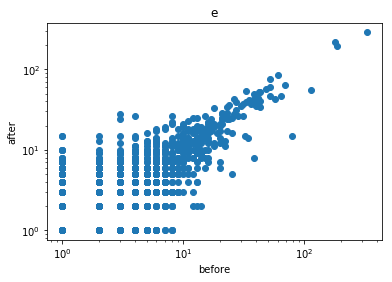

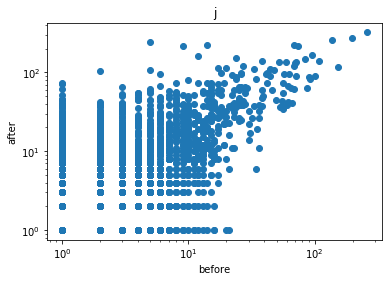

In [150]:
individualdegree(E_Before_same,E_After_same,'e')
individualdegree(J_Before_same,J_After_same,'j')

In [121]:
def cumlutive_degree_distribution(G): 
    degree = [] 
    li = G.degree() 
    for each_node in li:   
        degree.append(each_node[1])
    xs = degree
    distKeys = range(min(xs), max(xs) + 1) 
    pdf = dict([(k, 0) for k in distKeys]) 
    for x in xs:
        pdf[x] += 1
    pdf_temp=pdf
    scope = range(min(pdf),max(pdf)+1)
    for degree in scope:
        k=degree+1   
        while k<=max(pdf): 
            pdf[degree]+=pdf_temp[k]
            k+=1 
    return pdf 

In [138]:
def draw_degree_chart(G,name,distribution): 
    degree =distribution
    y = np.array(list(degree.values())) 
    y = y/y[0]
    x=range(len(degree))
    if 'B' in name: 
        color = 'r^'
        line = plt.loglog(x, y, color)
        plt.legend(line, ("before"))   
    else:
        color = 'g^'
        line = plt.loglog(x, y, color)
        plt.legend(line, ("a"))
    plt.title( name) 
    plt.show()

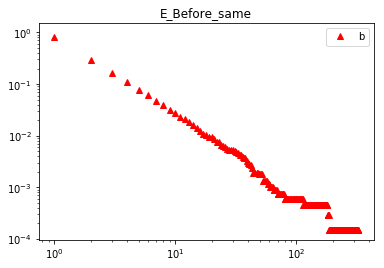

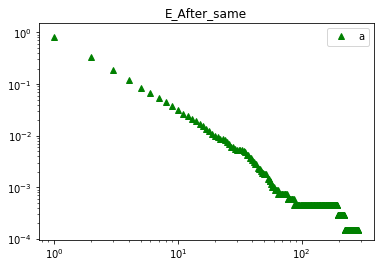

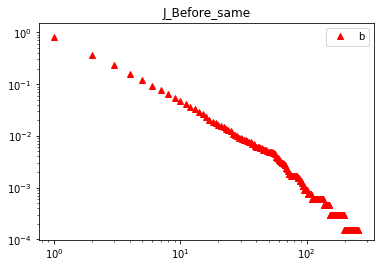

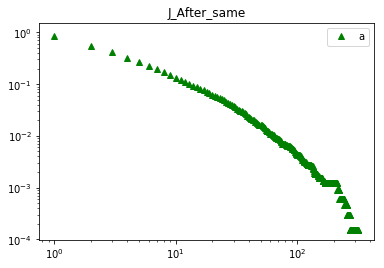

In [151]:
draw_degree_chart(E_Before_same,'E_Before_same',cumlutive_degree_distribution(E_Before_same))
draw_degree_chart(E_After_same,'E_After_same',cumlutive_degree_distribution(E_After_same))

draw_degree_chart(E_After_same,'J_Before_same',cumlutive_degree_distribution(J_Before_same))
draw_degree_chart(E_Before_same,'J_After_same',cumlutive_degree_distribution(J_After_same))